In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scanpy.external as sce
import seaborn as sns
import anndata as ad
import squidpy as sq
import scvi
from sccoda.util import cell_composition_data as dat
from sccoda.util import data_visualization as viz
import warnings
warnings.filterwarnings("ignore")
from sccoda.util import comp_ana as mod
from scipy import io
from scipy.sparse import coo_matrix, csr_matrix
import os
import anndata

Global seed set to 0


In [2]:
# load sparse matrix:
X = io.mmread("D:Scanpy/Peng_2019/matrix.mtx")

In [3]:
# create anndata object
peng = anndata.AnnData(
    X=X.transpose().tocsr()
)

In [4]:
# load cell metadata:
cell_meta = pd.read_csv("D:Scanpy/Peng_2019/metadata.csv")

In [5]:
# load gene names:
with open("D:Scanpy/Peng_2019/genes.csv", 'r') as f:
    gene_names = f.read().splitlines()

In [6]:
# set anndata observations and index obs by barcodes, var by gene names
peng.obs = cell_meta
peng.obs.index = peng.obs['barcode']
peng.var.index = gene_names

In [7]:
peng

AnnData object with n_obs × n_vars = 57419 × 18008
    obs: 'nCount_RNA', 'nFeature_RNA', 'Condition', 'Patient', 'percent.mt', 'percent.hb', 'percent.rp', 'author', 'barcode'

In [8]:
# load sparse matrix:
X = io.mmread("D:Scanpy/Steele_2020/matrix.mtx")

In [9]:
# create anndata object
steele = anndata.AnnData(
    X=X.transpose().tocsr()
)

In [10]:
# load cell metadata:
cell_meta = pd.read_csv("D:Scanpy/Steele_2020/metadata.csv")

In [11]:
# load gene names:
with open("D:Scanpy/Steele_2020/genes.csv", 'r') as f:
    gene_names = f.read().splitlines()

In [12]:
# set anndata observations and index obs by barcodes, var by gene names
steele.obs = cell_meta
steele.obs.index = steele.obs['barcode']
steele.var.index = gene_names

In [13]:
steele

AnnData object with n_obs × n_vars = 43600 × 24905
    obs: 'nCount_RNA', 'nFeature_RNA', 'Condition', 'Patient', 'percent.mt', 'percent.hb', 'percent.rp', 'author', 'barcode'

In [14]:
# load sparse matrix:
X = io.mmread("D:Scanpy/Lin_2020/matrix.mtx")

In [15]:
# create anndata object
lin = anndata.AnnData(
    X=X.transpose().tocsr()
)

In [16]:
# load cell metadata:
cell_meta = pd.read_csv("D:Scanpy/Lin_2020/metadata.csv")

In [17]:
# load gene names:
with open("D:Scanpy/Lin_2020/genes.csv", 'r') as f:
    gene_names = f.read().splitlines()

In [18]:
# set anndata observations and index obs by barcodes, var by gene names
lin.obs = cell_meta
lin.obs.index = lin.obs['barcode']
lin.var.index = gene_names

In [19]:
lin

AnnData object with n_obs × n_vars = 13816 × 23717
    obs: 'nCount_RNA', 'nFeature_RNA', 'Condition', 'Patient', 'percent.mt', 'percent.hb', 'percent.rp', 'author', 'barcode'

In [20]:
# load sparse matrix:
X = io.mmread("D:Scanpy/Lee_2021/matrix.mtx")

In [21]:
# create anndata object
lee = anndata.AnnData(
    X=X.transpose().tocsr()
)

In [22]:
# load cell metadata:
cell_meta = pd.read_csv("D:Scanpy/Lee_2021/metadata.csv")

In [23]:
# load gene names:
with open("D:Scanpy/Lee_2021/genes.csv", 'r') as f:
    gene_names = f.read().splitlines()

In [24]:
# set anndata observations and index obs by barcodes, var by gene names
lee.obs = cell_meta
lee.obs.index = lee.obs['barcode']
lee.var.index = gene_names

In [25]:
lee

AnnData object with n_obs × n_vars = 24856 × 23348
    obs: 'nCount_RNA', 'nFeature_RNA', 'Condition', 'Patient', 'percent.mt', 'percent.hb', 'percent.rp', 'author', 'barcode'

In [26]:
# load sparse matrix:
X = io.mmread("D:Scanpy/Chen_2022/matrix.mtx")

In [27]:
# create anndata object
chen = anndata.AnnData(
    X=X.transpose().tocsr()
)

In [28]:
# load cell metadata:
cell_meta = pd.read_csv("D:Scanpy/Chen_2022/metadata.csv")

In [29]:
# load gene names:
with open("D:Scanpy/Chen_2022/genes.csv", 'r') as f:
    gene_names = f.read().splitlines()

In [30]:
# set anndata observations and index obs by barcodes, var by gene names
chen.obs = cell_meta
chen.obs.index = chen.obs['barcode']
chen.var.index = gene_names

In [31]:
chen

AnnData object with n_obs × n_vars = 47720 × 27286
    obs: 'nCount_RNA', 'nFeature_RNA', 'Condition', 'Patient', 'percent.mt', 'percent.hb', 'percent.rp', 'author', 'barcode'

In [ ]:
#Merge the objects into a combined dataset

In [32]:
adata = peng.concatenate(steele, lin, lee, chen)

In [33]:
adata

AnnData object with n_obs × n_vars = 187411 × 15536
    obs: 'nCount_RNA', 'nFeature_RNA', 'Condition', 'Patient', 'percent.mt', 'percent.hb', 'percent.rp', 'author', 'barcode', 'batch'

In [ ]:
#In our combined dataset, we have around 188k cells and ~15k genes. We have different versions of genome, so to avoid batch effects we retained genes that were common to all 5 datasets! 

In [ ]:
#Remove the objects to reduce memory cost

In [34]:
del(cell_meta, peng, lee, lin, steele, chen, X, gene_names)

In [35]:
adata.obs

,nCount_RNA,nFeature_RNA,Condition,Patient,percent.mt,percent.hb,percent.rp,author,barcode,batch
barcode,,,,,,,,,,
T1_AAACCTGAGATGTCGG-0,11812,3343,T,T1,0.000000,0.016932,21.596681,Peng_2019,T1_AAACCTGAGATGTCGG,0
T1_AAACGGGGTCATGCAT-0,1935,974,T,T1,0.000000,0.000000,21.343669,Peng_2019,T1_AAACGGGGTCATGCAT,0
T1_AAAGATGCATGTTGAC-0,3811,1490,T,T1,0.000000,0.026240,31.382839,Peng_2019,T1_AAAGATGCATGTTGAC,0
T1_AAAGATGGTCGAGTTT-0,2069,1101,T,T1,0.000000,0.048333,10.391493,Peng_2019,T1_AAAGATGGTCGAGTTT,0
T1_AAAGATGGTCTCTCTG-0,8706,3189,T,T1,0.000000,0.057432,23.156444,Peng_2019,T1_AAAGATGGTCTCTCTG,0
...,...,...,...,...,...,...,...,...,...,...
ADJ6_TTTGTTGGTGATACTC-1-4,6129,1642,ADJ,ADJ6,8.647414,0.000000,35.372818,Chen_2022,ADJ6_TTTGTTGGTGATACTC-1,4
ADJ6_TTTGTTGGTTGGTACT-1-4,3341,1175,ADJ,ADJ6,7.452858,0.000000,27.656390,Chen_2022,ADJ6_TTTGTTGGTTGGTACT-1,4
ADJ6_TTTGTTGTCAGCTTCC-1-4,4230,1696,ADJ,ADJ6,7.281324,0.000000,17.919622,Chen_2022,ADJ6_TTTGTTGTCAGCTTCC-1,4


In [ ]:
#scVI uses the raw counts! To avoid errors, we need to copy the raw counts matrix (which is allocated in X) because scVI takes the raw counts as input

In [36]:
adata.layers['counts'] = adata.X.copy()

In [ ]:
#We perform data normalization and log-transform just like the standard Scanpy workflow

In [37]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata

In [ ]:
#Here we specify our main batch_key to perform data integration. Considering that our goal is to perform integration across different datasets we defined 'author' as batch_key 

In [38]:
condition_key = "author"

In [ ]:
#Only a few variable genes actually carry relevant information about our data heterogeneity. In this step, we retain only the top 3000 variable genes. These genes will be used on data integration and clustering

In [39]:
sc.pp.highly_variable_genes(adata, flavor='seurat', n_top_genes=3000, layer='counts', subset=True, batch_key=condition_key)

In [ ]:
#Next we define the parameters for our scVI-model. We have other categorial (Condition, Patient) and continuous (nCount_RNA and percent.mt) that might affect the dimensionality reduction.
#scVI has been shown to perform good batch correction across multiple datasets while preserving biological variability between datasets
#scVI uses an artificial neural network to reduce the dimensionality

In [40]:
scvi.model.SCVI.setup_anndata(adata, layer = "counts", batch_key = condition_key,
                              categorical_covariate_keys=['Condition', 'author', 'Patient'],
                              continuous_covariate_keys=['nCount_RNA', 'percent.mt'])

INFO     Using batches from adata.obs["author"]                                                                    
INFO     No label_key inputted, assuming all cells have same label                                                 
INFO     Using data from adata.layers["counts"]                                                                    
INFO     Successfully registered anndata object containing 187411 cells, 3000 vars, 5 batches, 1 labels, and 0     
         proteins. Also registered 3 extra categorical covariates and 2 extra continuous covariates.               
INFO     Please do not further modify adata until model is trained.                                                


In [ ]:
#These values were picked as reference from a benchmark study

In [41]:
model = scvi.model.SCVI(adata, n_layers=2, n_latent=30)

In [ ]:
#From https://www.sc-best-practices.org/cellular_structure/integration.html#variational-autoencoder-vae-based-integration
#The model will be trained for a given number of epochs, a training iteration where every cell is passed through the network.
#By default scVI uses the following heuristic to set the number of epochs. For datasets with fewer than 20,000 cells, 400 epochs will be used and as the number of cells grows above 20,000 the number of epochs is continuously reduced.
#The reasoning behind this is that as the network sees more cells during each epoch it can learn the same amount of information as it would from more epochs with fewer cells.

In [42]:
model.train(max_epochs=100)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores


Epoch 100/100: 100%|███████████████████████████████████████| 100/100 [2:40:24<00:00, 96.24s/it, loss=1.06e+03, v_num=1]


In [ ]:
#Then we extract the latent representation

In [43]:
adata.obsm['X_scVI'] = model.get_latent_representation()

In [ ]:
#Extract normalized counts matrix for the 3000 highly variable genes. Can be used to perform differential expression analysis and build heatmaps

In [44]:
adata.layers['scvi_normalized'] = model.get_normalized_expression(library_size = 1e4)

In [45]:
sc.pp.neighbors(adata, use_rep = 'X_scVI')

In [46]:
sc.tl.umap(adata)

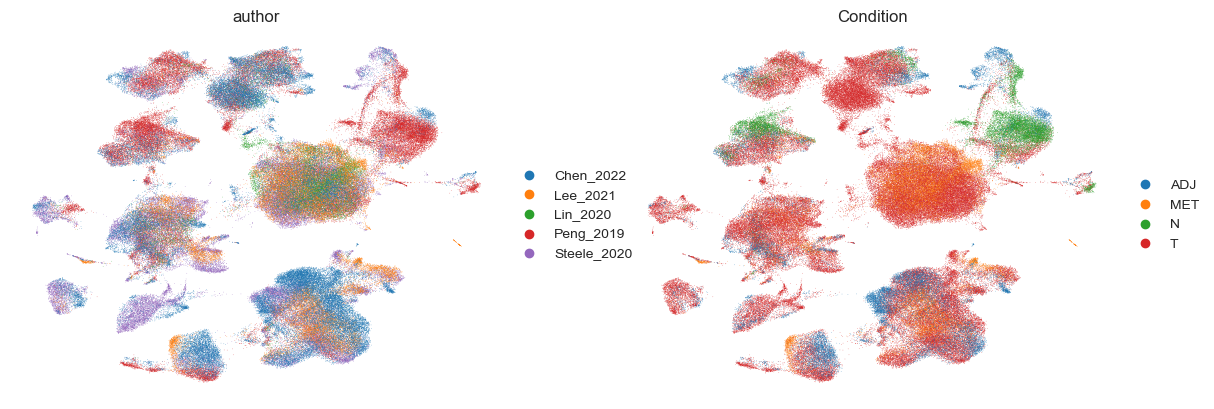

In [47]:
sc.pl.umap(adata, color=['author', 'Condition'], ncols=2, frameon=False)

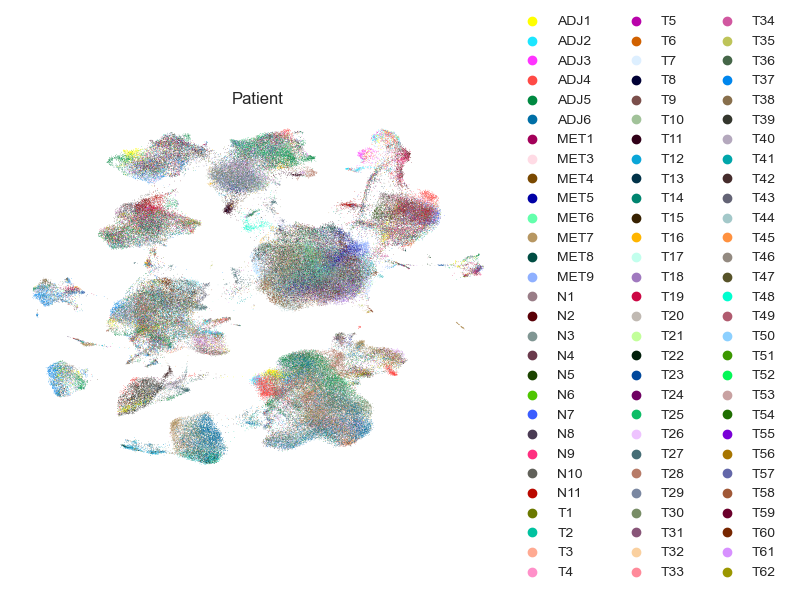

In [48]:
sc.pl.umap(adata, color='Patient', frameon=False)

In [51]:
#Epithelial and cell-cycle markers
#sc.pl.umap(adata, color=['FXYD2', 'FXYD3', 'KRT19', 'TOP2A'], ncols=2, frameon=False, cmap='viridis')

In [157]:
#Acinar, ductal and endocrine cells markers
#sc.pl.umap(adata, color=['REG3A', 'AMY2A', 'EPCAM', 'INS'], ncols=2, frameon=False, cmap='viridis')

In [156]:
#Myeloid cells markers
#sc.pl.umap(adata, color=['CD14', 'CD68', 'CPA3', 'CSF3R'], ncols=2, frameon=False, cmap='viridis')

In [155]:
#T-NK cells markers
#sc.pl.umap(adata, color=['CD3D', 'CD8A', 'NKG7', 'FOXP3'], ncols=2, frameon=False, cmap='viridis')

In [154]:
#B and plasma cells markers
#sc.pl.umap(adata, color=['MS4A1', 'CD79A', 'IRF4', 'MZB1'], ncols=2, frameon=False, cmap='viridis')

In [153]:
#Stromal markers
#sc.pl.umap(adata, color=['DCN', 'ACTA2', 'CDH5', 'RGS5'], ncols=2, frameon=False, cmap='viridis')

In [152]:
#Schwann cells markers
#sc.pl.umap(adata, color=['S100B', 'PDGFA', 'PLP1', 'PMP22'], ncols=2, frameon=False, cmap='viridis')

In [76]:
sc.tl.leiden(adata, resolution=0.5)

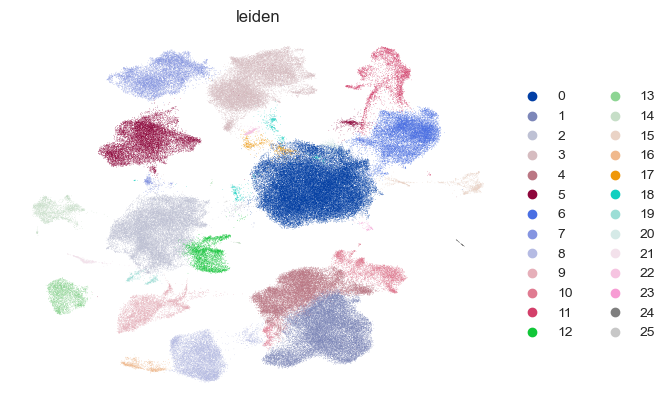

In [79]:
sc.pl.umap(adata, color='leiden', frameon=False)

In [120]:
#sc.pl.umap(adata, color='leiden', frameon=False, legend_loc = 'on data')

In [84]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
markers = sc.get.rank_genes_groups_df(adata, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > .5)]
markers

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,KRT19,287.924805,5.411993,0.000000,0.000000
1,0,S100A6,280.737823,3.415047,0.000000,0.000000
2,0,C19orf33,262.918793,5.498676,0.000000,0.000000
3,0,FXYD3,260.196014,5.023024,0.000000,0.000000
4,0,CLDN4,259.385590,4.784739,0.000000,0.000000
...,...,...,...,...,...,...
388686,25,CAPG,3.290349,2.141623,0.001001,0.048429
388687,25,RBM47,3.286599,2.260643,0.001014,0.048775
388688,25,TACSTD2,3.282037,2.603209,0.001031,0.049418
388689,25,WFDC2,3.280576,2.436083,0.001036,0.049522


In [151]:
#markers[markers.group=="24"]

In [108]:
#sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

In [121]:
cell_type = {"0":"Malignant cells",
"1":"T-NK cells",
"2":"Myeloid cells",
"3":"Fibroblasts",
"4":"T-NK cells",
"5":"Endothelial cells",
"6":"Ductal cells",
"7":"Stellate cells",
"8":"B cells",
"9":"Myeloid cells",
"10":"T-NK cells",
"11":"Acinar cells",
"12":"Myeloid cells",
"13":"Mast cells",
"14":"Plasma cells",
"15":"Endocrine cells",
"16":"B cells",
"17":"Malignant cells",
"18":"Junk",
"19":"Myeloid cells",
"20":"Malignant cells",
"21":"B cells",
"22":"Schwann cells",
"23":"Malignant cells",
"24":"Junk",
"25":"Malignant cells"
}

In [122]:
adata.obs['cell_type'] = adata.obs.leiden.map(cell_type)

In [123]:
adata.uns['markers'] = markers

In [124]:
adata.write_h5ad('D:/Scanpy/scviPDACatlas.h5ad')
model.save('D:/Scanpy/sscviPDACatlasmodel.model')

In [125]:
adata = adata[~adata.obs['cell_type'].isin(['Junk']),:]

In [126]:
adata

View of AnnData object with n_obs × n_vars = 186761 × 3000
    obs: 'nCount_RNA', 'nFeature_RNA', 'Condition', 'Patient', 'percent.mt', 'percent.hb', 'percent.rp', 'author', 'barcode', 'batch', '_scvi_batch', '_scvi_labels', 'leiden', 'cell_type'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'log1p', 'hvg', '_scvi', 'neighbors', 'umap', 'author_colors', 'Condition_colors', 'Patient_colors', 'leiden', 'leiden_colors', 'rank_genes_groups', 'markers'
    obsm: '_scvi_extra_categoricals', '_scvi_extra_continuous', 'X_scVI', 'X_umap'
    layers: 'counts', 'scvi_normalized'
    obsp: 'distances', 'connectivities'

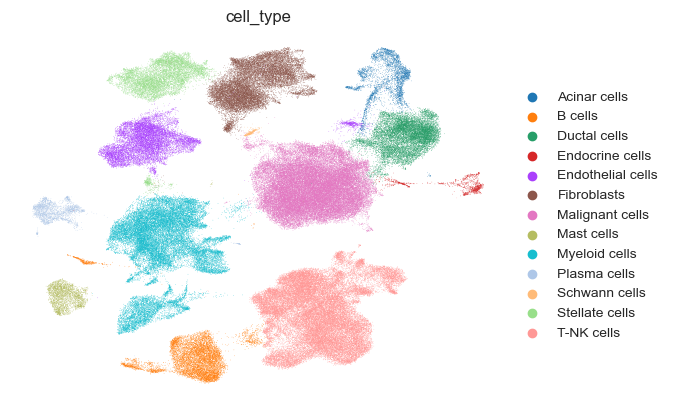

In [127]:
sc.pl.umap(adata, color = 'cell_type', frameon=False)

In [130]:
sc.set_figure_params(dpi=100)

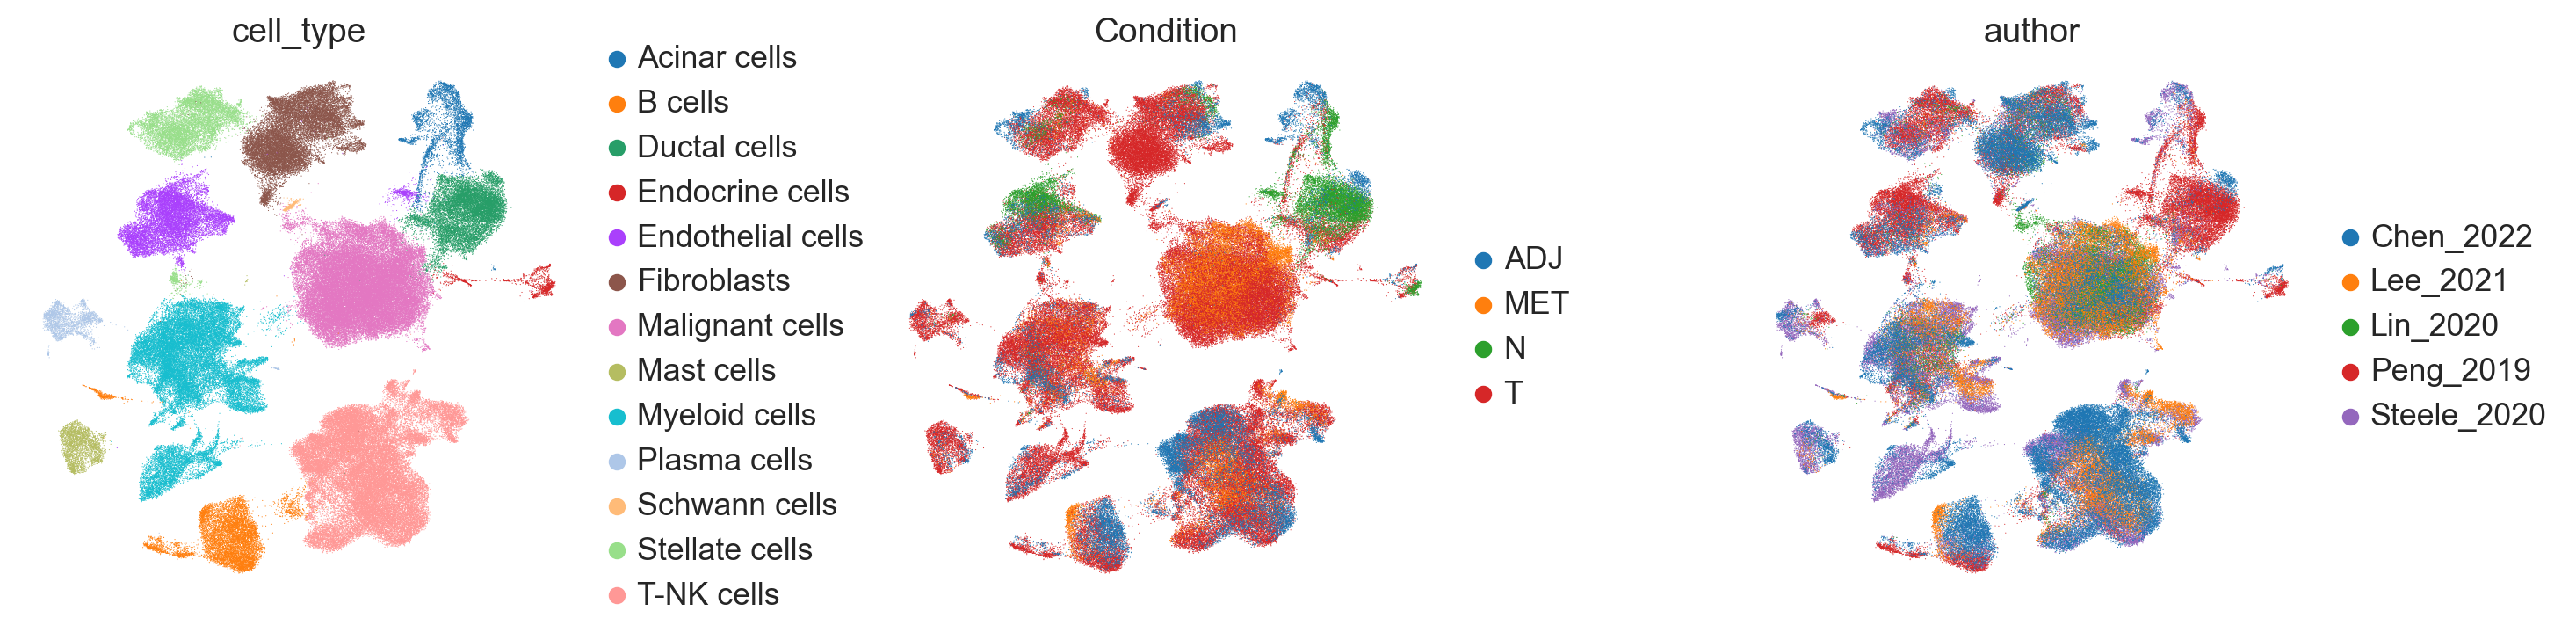

In [136]:
sc.pl.umap(adata, color = ['cell_type', 'Condition', 'author'], frameon=False, ncols=3, wspace=0.4)

In [137]:
adata.obs.groupby(['Patient']).count()

,nCount_RNA,nFeature_RNA,Condition,percent.mt,percent.hb,percent.rp,author,barcode,batch,_scvi_batch,_scvi_labels,leiden,cell_type
Patient,,,,,,,,,,,,,
ADJ1,3351,3351,3351,3351,3351,3351,3351,3351,3351,3351,3351,3351,3351
ADJ2,2126,2126,2126,2126,2126,2126,2126,2126,2126,2126,2126,2126,2126
ADJ3,619,619,619,619,619,619,619,619,619,619,619,619,619
ADJ4,4241,4241,4241,4241,4241,4241,4241,4241,4241,4241,4241,4241,4241
ADJ5,5864,5864,5864,5864,5864,5864,5864,5864,5864,5864,5864,5864,5864
...,...,...,...,...,...,...,...,...,...,...,...,...,...
T58,1394,1394,1394,1394,1394,1394,1394,1394,1394,1394,1394,1394,1394
T59,1560,1560,1560,1560,1560,1560,1560,1560,1560,1560,1560,1560,1560
T60,4474,4474,4474,4474,4474,4474,4474,4474,4474,4474,4474,4474,4474


In [138]:
num_tot_cells = adata.obs.groupby(['Patient']).count()
num_tot_cells = dict(zip(num_tot_cells.index, num_tot_cells.leiden))
num_tot_cells

{'ADJ1': 3351,
 'ADJ2': 2126,
 'ADJ3': 619,
 'ADJ4': 4241,
 'ADJ5': 5864,
 'ADJ6': 6112,
 'MET1': 416,
 'MET3': 118,
 'MET4': 251,
 'MET5': 2899,
 'MET6': 2477,
 'MET7': 9558,
 'MET8': 3137,
 'MET9': 1834,
 'N1': 2823,
 'N2': 1956,
 'N3': 452,
 'N4': 974,
 'N5': 885,
 'N6': 717,
 'N7': 1114,
 'N8': 1188,
 'N9': 2466,
 'N10': 1517,
 'N11': 1365,
 'T1': 1170,
 'T2': 3040,
 'T3': 1314,
 'T4': 1027,
 'T5': 1107,
 'T6': 1871,
 'T7': 747,
 'T8': 697,
 'T9': 2330,
 'T10': 827,
 'T11': 3140,
 'T12': 2269,
 'T13': 2056,
 'T14': 1996,
 'T15': 1952,
 'T16': 1633,
 'T17': 2081,
 'T18': 1557,
 'T19': 2914,
 'T20': 482,
 'T21': 806,
 'T22': 2214,
 'T23': 2863,
 'T24': 1810,
 'T25': 6564,
 'T26': 5413,
 'T27': 5046,
 'T28': 5327,
 'T29': 4121,
 'T30': 4574,
 'T31': 1017,
 'T32': 1565,
 'T33': 2092,
 'T34': 1543,
 'T35': 1148,
 'T36': 1991,
 'T37': 7013,
 'T38': 4022,
 'T39': 3746,
 'T40': 1177,
 'T41': 1602,
 'T42': 1081,
 'T43': 970,
 'T44': 4548,
 'T45': 571,
 'T46': 2431,
 'T47': 950,
 'T48': 500,

In [148]:
cell_type_counts = adata.obs.groupby(['Patient', 'Condition', 'cell_type']).count()
cell_type_counts = cell_type_counts[cell_type_counts.sum(axis = 1) > 0].reset_index()
cell_type_counts = cell_type_counts[cell_type_counts.columns[0:4]]
cell_type_counts

,Patient,Condition,cell_type,nCount_RNA
0,ADJ1,ADJ,Acinar cells,195
1,ADJ1,ADJ,B cells,59
2,ADJ1,ADJ,Ductal cells,223
3,ADJ1,ADJ,Endocrine cells,62
4,ADJ1,ADJ,Endothelial cells,112
...,...,...,...,...
903,T62,T,Endocrine cells,3
904,T62,T,Malignant cells,62
905,T62,T,Myeloid cells,64
906,T62,T,Plasma cells,4


In [149]:
cell_type_counts['total_cells'] = cell_type_counts.Patient.map(num_tot_cells).astype(int)
cell_type_counts['frequency'] = cell_type_counts.nCount_RNA / cell_type_counts.total_cells
cell_type_counts

,Patient,Condition,cell_type,nCount_RNA,total_cells,frequency
0,ADJ1,ADJ,Acinar cells,195,3351,0.058192
1,ADJ1,ADJ,B cells,59,3351,0.017607
2,ADJ1,ADJ,Ductal cells,223,3351,0.066547
3,ADJ1,ADJ,Endocrine cells,62,3351,0.018502
4,ADJ1,ADJ,Endothelial cells,112,3351,0.033423
...,...,...,...,...,...,...
903,T62,T,Endocrine cells,3,676,0.004438
904,T62,T,Malignant cells,62,676,0.091716
905,T62,T,Myeloid cells,64,676,0.094675
906,T62,T,Plasma cells,4,676,0.005917


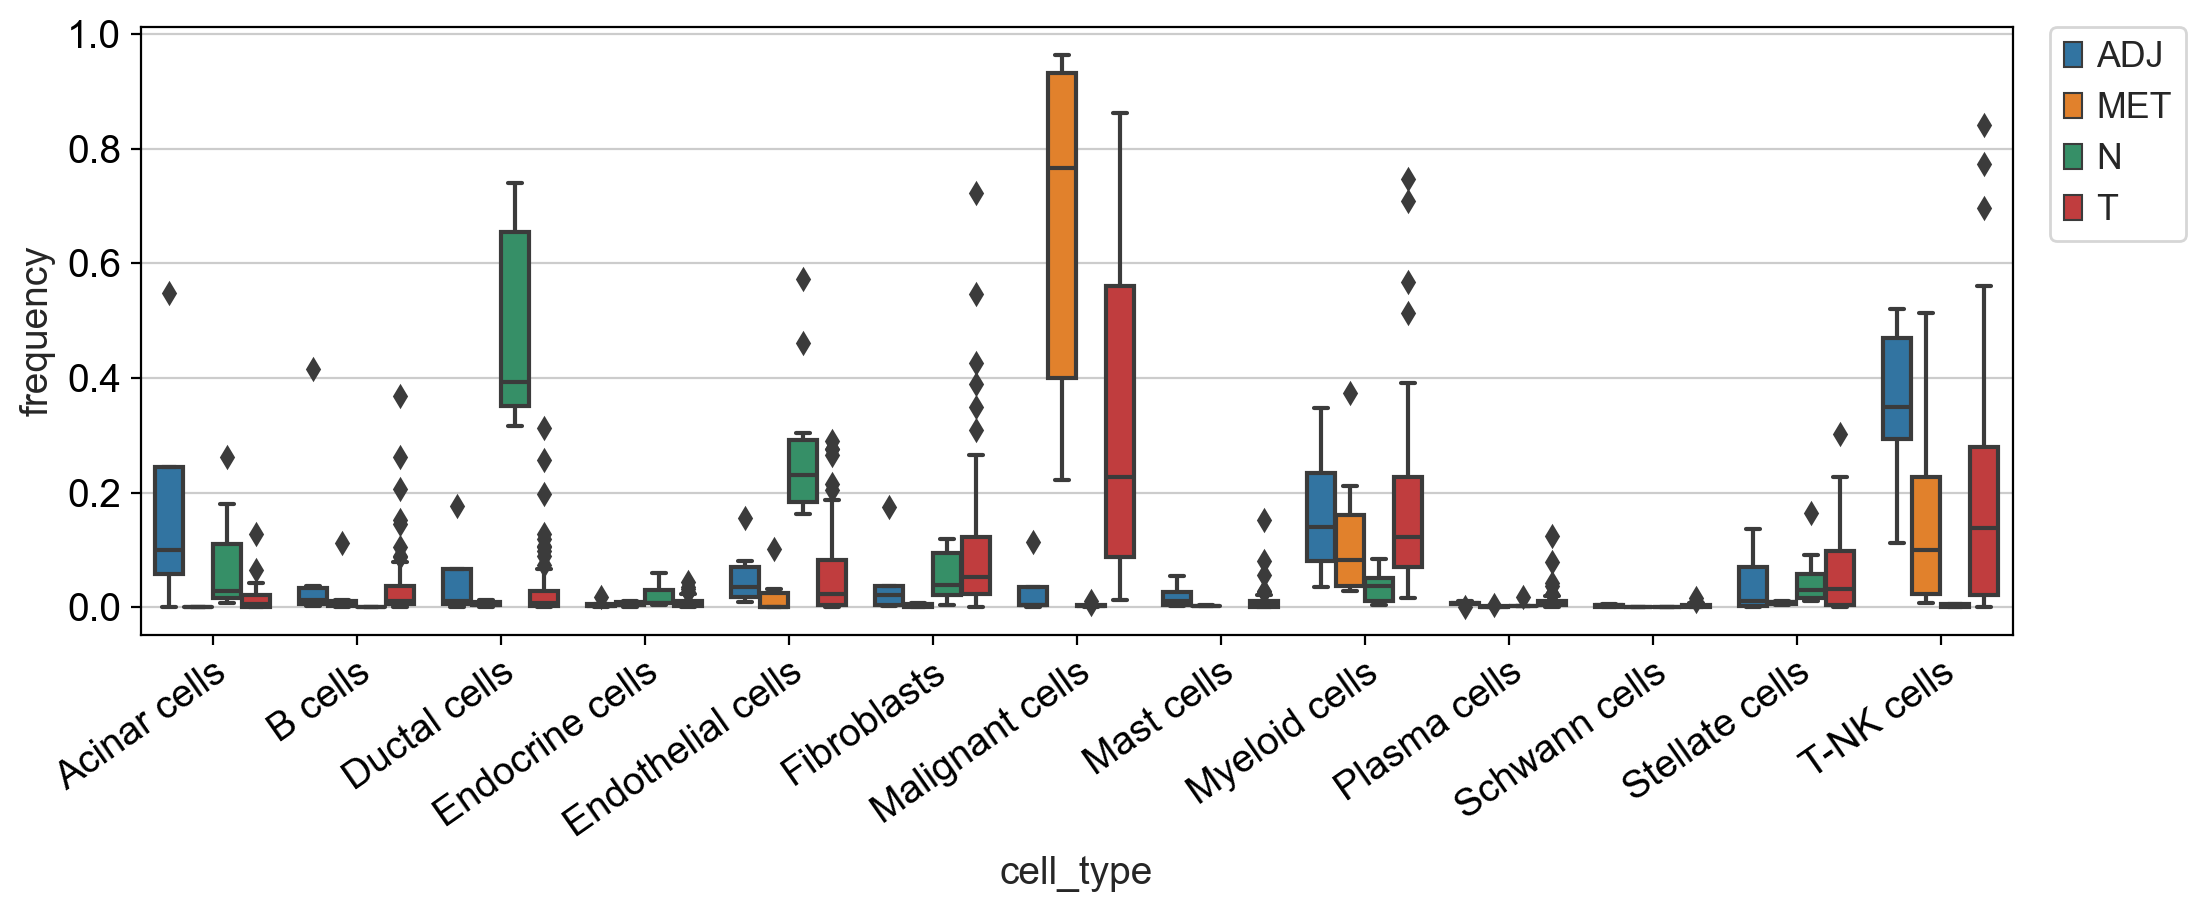

In [150]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,4))
ax = sns.boxplot(data = cell_type_counts, x = 'cell_type', y = 'frequency', hue = 'Condition')
plt.xticks(rotation = 35, rotation_mode = 'anchor', ha = 'right')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [143]:
cell_type_counts = adata.obs.groupby(['Patient', 'author', 'cell_type']).count()
cell_type_counts = cell_type_counts[cell_type_counts.sum(axis = 1) > 0].reset_index()
cell_type_counts = cell_type_counts[cell_type_counts.columns[0:4]]
cell_type_counts

,Patient,author,cell_type,nCount_RNA
0,ADJ1,Steele_2020,Acinar cells,195
1,ADJ1,Steele_2020,B cells,59
2,ADJ1,Steele_2020,Ductal cells,223
3,ADJ1,Steele_2020,Endocrine cells,62
4,ADJ1,Steele_2020,Endothelial cells,112
...,...,...,...,...
903,T62,Lee_2021,Endocrine cells,3
904,T62,Lee_2021,Malignant cells,62
905,T62,Lee_2021,Myeloid cells,64
906,T62,Lee_2021,Plasma cells,4


In [144]:
cell_type_counts['total_cells'] = cell_type_counts.Patient.map(num_tot_cells).astype(int)
cell_type_counts['frequency'] = cell_type_counts.nCount_RNA / cell_type_counts.total_cells
cell_type_counts

,Patient,author,cell_type,nCount_RNA,total_cells,frequency
0,ADJ1,Steele_2020,Acinar cells,195,3351,0.058192
1,ADJ1,Steele_2020,B cells,59,3351,0.017607
2,ADJ1,Steele_2020,Ductal cells,223,3351,0.066547
3,ADJ1,Steele_2020,Endocrine cells,62,3351,0.018502
4,ADJ1,Steele_2020,Endothelial cells,112,3351,0.033423
...,...,...,...,...,...,...
903,T62,Lee_2021,Endocrine cells,3,676,0.004438
904,T62,Lee_2021,Malignant cells,62,676,0.091716
905,T62,Lee_2021,Myeloid cells,64,676,0.094675
906,T62,Lee_2021,Plasma cells,4,676,0.005917


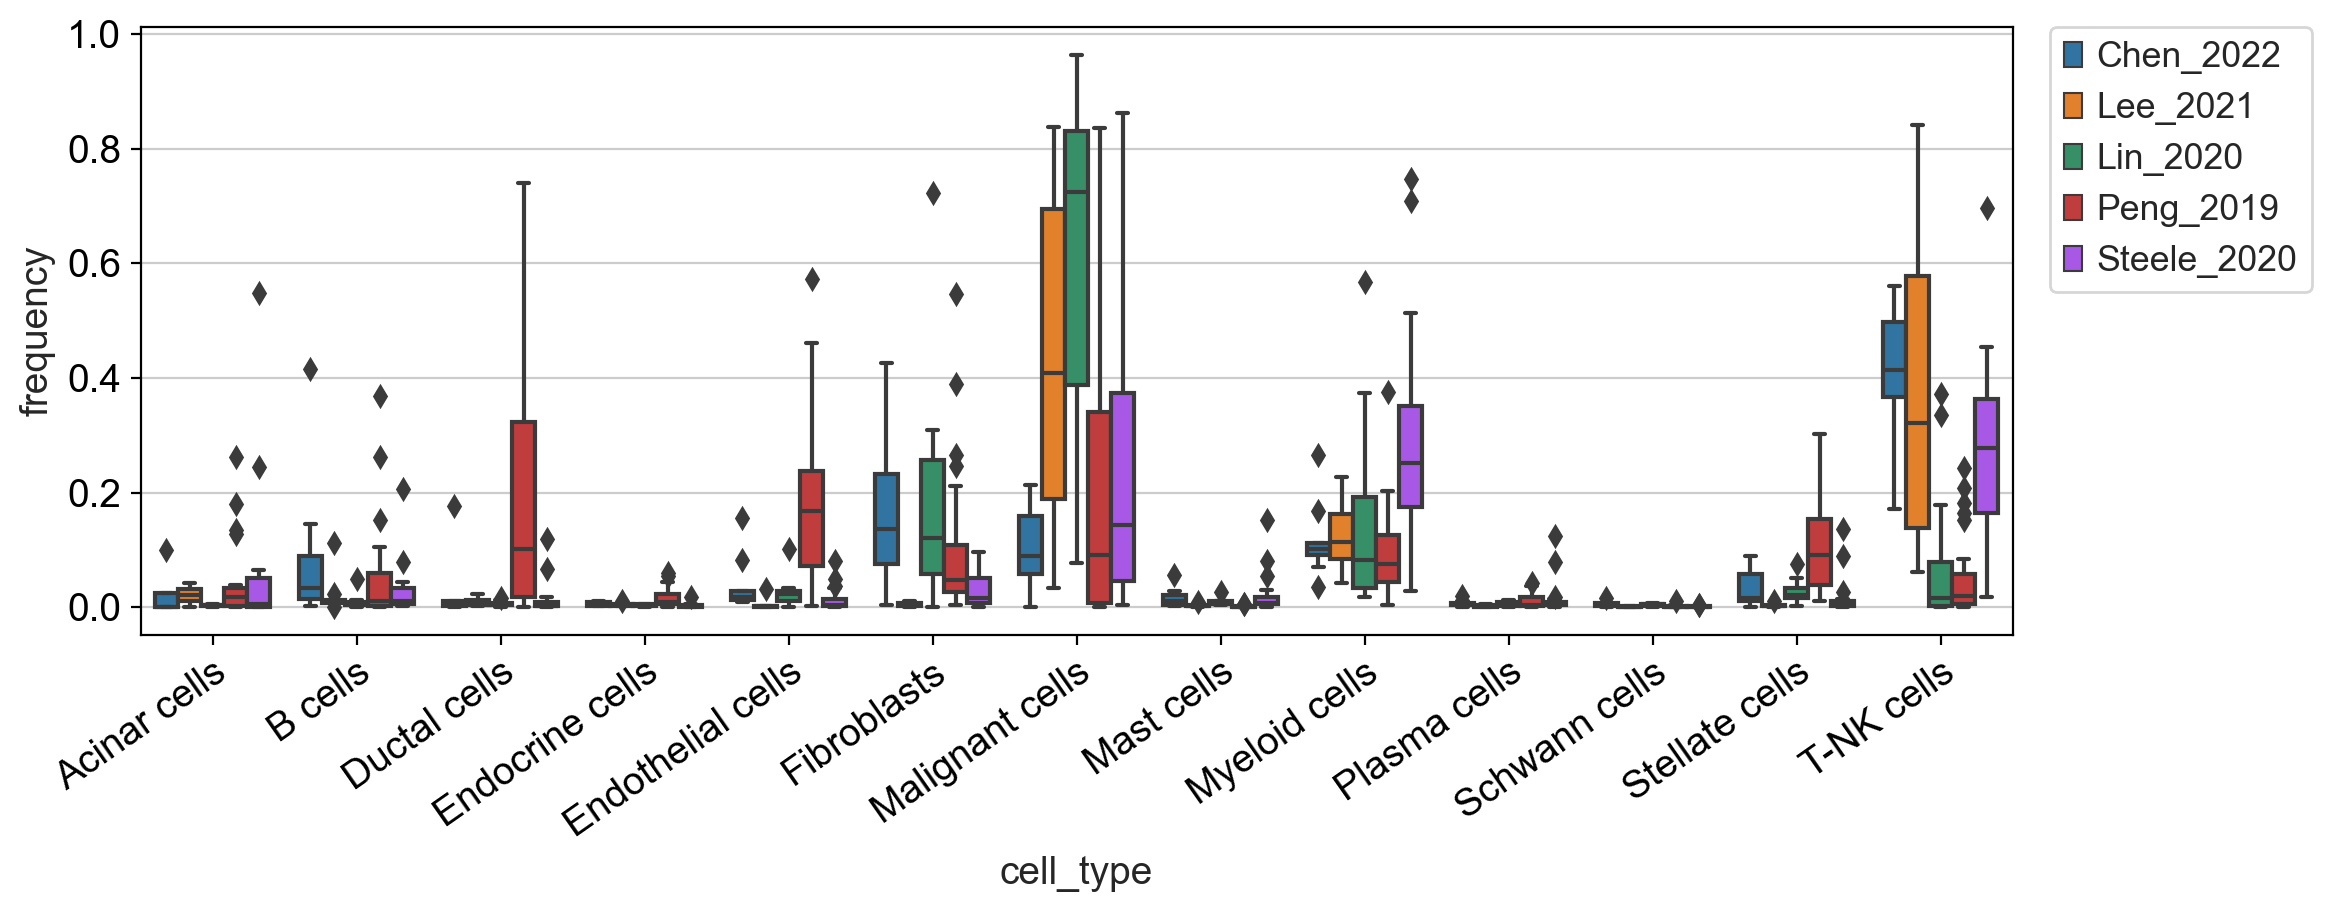

In [146]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,4))
ax = sns.boxplot(data = cell_type_counts, x = 'cell_type', y = 'frequency', hue = 'author')
plt.xticks(rotation = 35, rotation_mode = 'anchor', ha = 'right')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()